### This notebook is dedicated to plot the dynamic spectrum of radio emissions observed by the Parker Solar Probe (PSP), the FIELDS Radio Frequency Spectrometer (RFS) instrument 
##### Compiled by: Mohamed Nedal, Institute of Astronomy with National Astronomical Observatory, Bulgarian Academy of Sciences, Sofia, Bulgaria 
##### Many thanks to: Bing Ma$^{1,2}$, Marc Pulupa$^3$, Dejin Wu$^1$, Kamen Kozarev$^5$, Peijin Zhang$^5$, and Jon Vandegriff$^4$ 
$^1$ Key Laboratory of Planetary Sciences, Purple Mountain Observatory, Chinese Academy of Sciences, Nanjing 210023, People’s Republic of China 

$^2$ School of Astronomy and Space Science, University of Science and Technology of China, Hefei 230026, People’s Republic of China 

$^3$ Space Sciences Laboratory, University of California, Berkeley, CA 94720-7450, USA 

$^4$ JHU Applied Physics Laboratory, 11100 Johns Hopkins Road Laurel, Maryland 20723, USA 

$^5$ Institute of Astronomy with National Astronomical Observatory, Bulgarian Academy of Sciences, Sofia, Bulgaria 

* Description of parameters can be found in [this website.](https://hpde.io/NASA/NumericalData/ParkerSolarProbe/FIELDS/RFS/Level2/HFR/PT7S.html) 
* CDF data files can be found in [this website.](http://research.ssl.berkeley.edu/data/psp/data/sci/fields/) 

In [1]:
import os
os.environ['CDF_LIB'] = '/home/peijin/cdf/cdf38_0-dist/lib'
from spacepy import pycdf
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
# myFmt = DateFormatter('%Y/%m/%d %H:%M')
myFmt = DateFormatter('%H:%M')

In [9]:
cdf_files

['psp_fld_l2_rfs_lfr_20190401_v02.cdf', 'psp_fld_l2_rfs_hfr_20190401_v02.cdf']

In [23]:
cdf_files = []
if len(cdf_files) == 0:
    print('No CDF files are imported yet.')
    choice = input('\nDo you want to import a CDF file? [y/n]')
    if choice == 'y':
        while True:
            print('Available CDF files are:\n')
            print(*os.listdir(), sep='\n')
            cdf_files.append(input('\nWhich file to import?\n\n'))
            choice = input('\nDo you want to import another file? [y/n]')
            if choice == 'n':
                print('OK, that is enough files.\nNow let us analyze')
                break
    else:
        print('\nCome on! There are no CDF files imported to be analyzed.\nLet us import one at least')
        while True:
            print('Available CDF files are:\n')
            print(*os.listdir(), sep='\n')
            cdf_files.append(input('\nWhich file to import?\n\n'))
            choice = input('\nDo you want to import another file? [y/n]')
            if choice == 'n':
                print('OK, that is enough files.\nNow let us analyze ..')
                break
else:
    print('{} CDF files are already imported'.format(len(cdf_files)))


print('\nThe imported CDF files are:\n')
for i, file in zip(range(len(cdf_files)), cdf_files):
    print(i, file)

No CDF files are imported yet.



Do you want to import a CDF file? [y/n] y


Available CDF files are:

psp_fld_l2_rfs_lfr_20190401_v02.cdf
.git
LICENSE
plot_psp.ipynb
README.md
psp_fld_l2_rfs_hfr_20190401_v02.cdf
.ipynb_checkpoints



Which file to import?

 psp_fld_l2_rfs_lfr_20190401_v02.cdf

Do you want to import another file? [y/n] y


Available CDF files are:

psp_fld_l2_rfs_lfr_20190401_v02.cdf
.git
LICENSE
plot_psp.ipynb
README.md
psp_fld_l2_rfs_hfr_20190401_v02.cdf
.ipynb_checkpoints



Which file to import?

 psp_fld_l2_rfs_hfr_20190401_v02.cdf

Do you want to import another file? [y/n] n


OK, that is enough files.
Now let us analyze
The imported CDF files are:

0 psp_fld_l2_rfs_lfr_20190401_v02.cdf
1 psp_fld_l2_rfs_hfr_20190401_v02.cdf


In [24]:
cdf_lfr = pycdf.CDF(cdf_files[0])
cdf_hfr = pycdf.CDF(cdf_files[1])

### Define the parameters for the Low Frequncy Receiver (LFR): 10.5 kHz $-$ 1.7 MHz 

In [27]:
tmin_lfr = cdf_lfr['epoch_lfr'].meta['SCALEMIN']
tmax_lfr = cdf_lfr['epoch_lfr'].meta['SCALEMAX']

# convert pixels values to dB, # z-axis 
arr1_lfr = np.array(cdf_lfr.get('psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2'))
arr2_lfr = np.array(cdf_lfr.get('psp_fld_l2_rfs_lfr_auto_averages_ch1_V3V4'))
arr_total_lfr = arr1_lfr + arr2_lfr
Lp_lfr = 10 * np.log10(arr_total_lfr/10**-16)
# x-axis 
tm_lfr = np.array(cdf_lfr.get('epoch_lfr'))
# y-axis 
freq_lfr = np.array(cdf_lfr.get('frequency_lfr_auto_averages_ch0_V1V2'))

### Define the parameters for the High Frequncy Receiver (HFR): 1.3 $-$ 19.2 MHz 

In [29]:
tmin_hfr = cdf_hfr['epoch_hfr'].meta['SCALEMIN']
tmax_hfr = cdf_hfr['epoch_hfr'].meta['SCALEMAX']

# convert pixels values to dB, # z-axis 
arr1_hfr = np.array(cdf_hfr.get('psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2'))
arr2_hfr = np.array(cdf_hfr.get('psp_fld_l2_rfs_hfr_auto_averages_ch1_V3V4'))
arr_total_hfr = arr1_hfr + arr2_hfr
Lp_hfr = 10 * np.log10(arr_total_hfr/10**-16)
# x-axis 
tm_hfr = np.array(cdf_hfr.get('epoch_hfr'))
# y-axis 
freq_hfr = np.array(cdf_hfr.get('frequency_hfr_auto_averages_ch0_V1V2'))

### Plot the Dynamic Spectra of Radio Emissions 

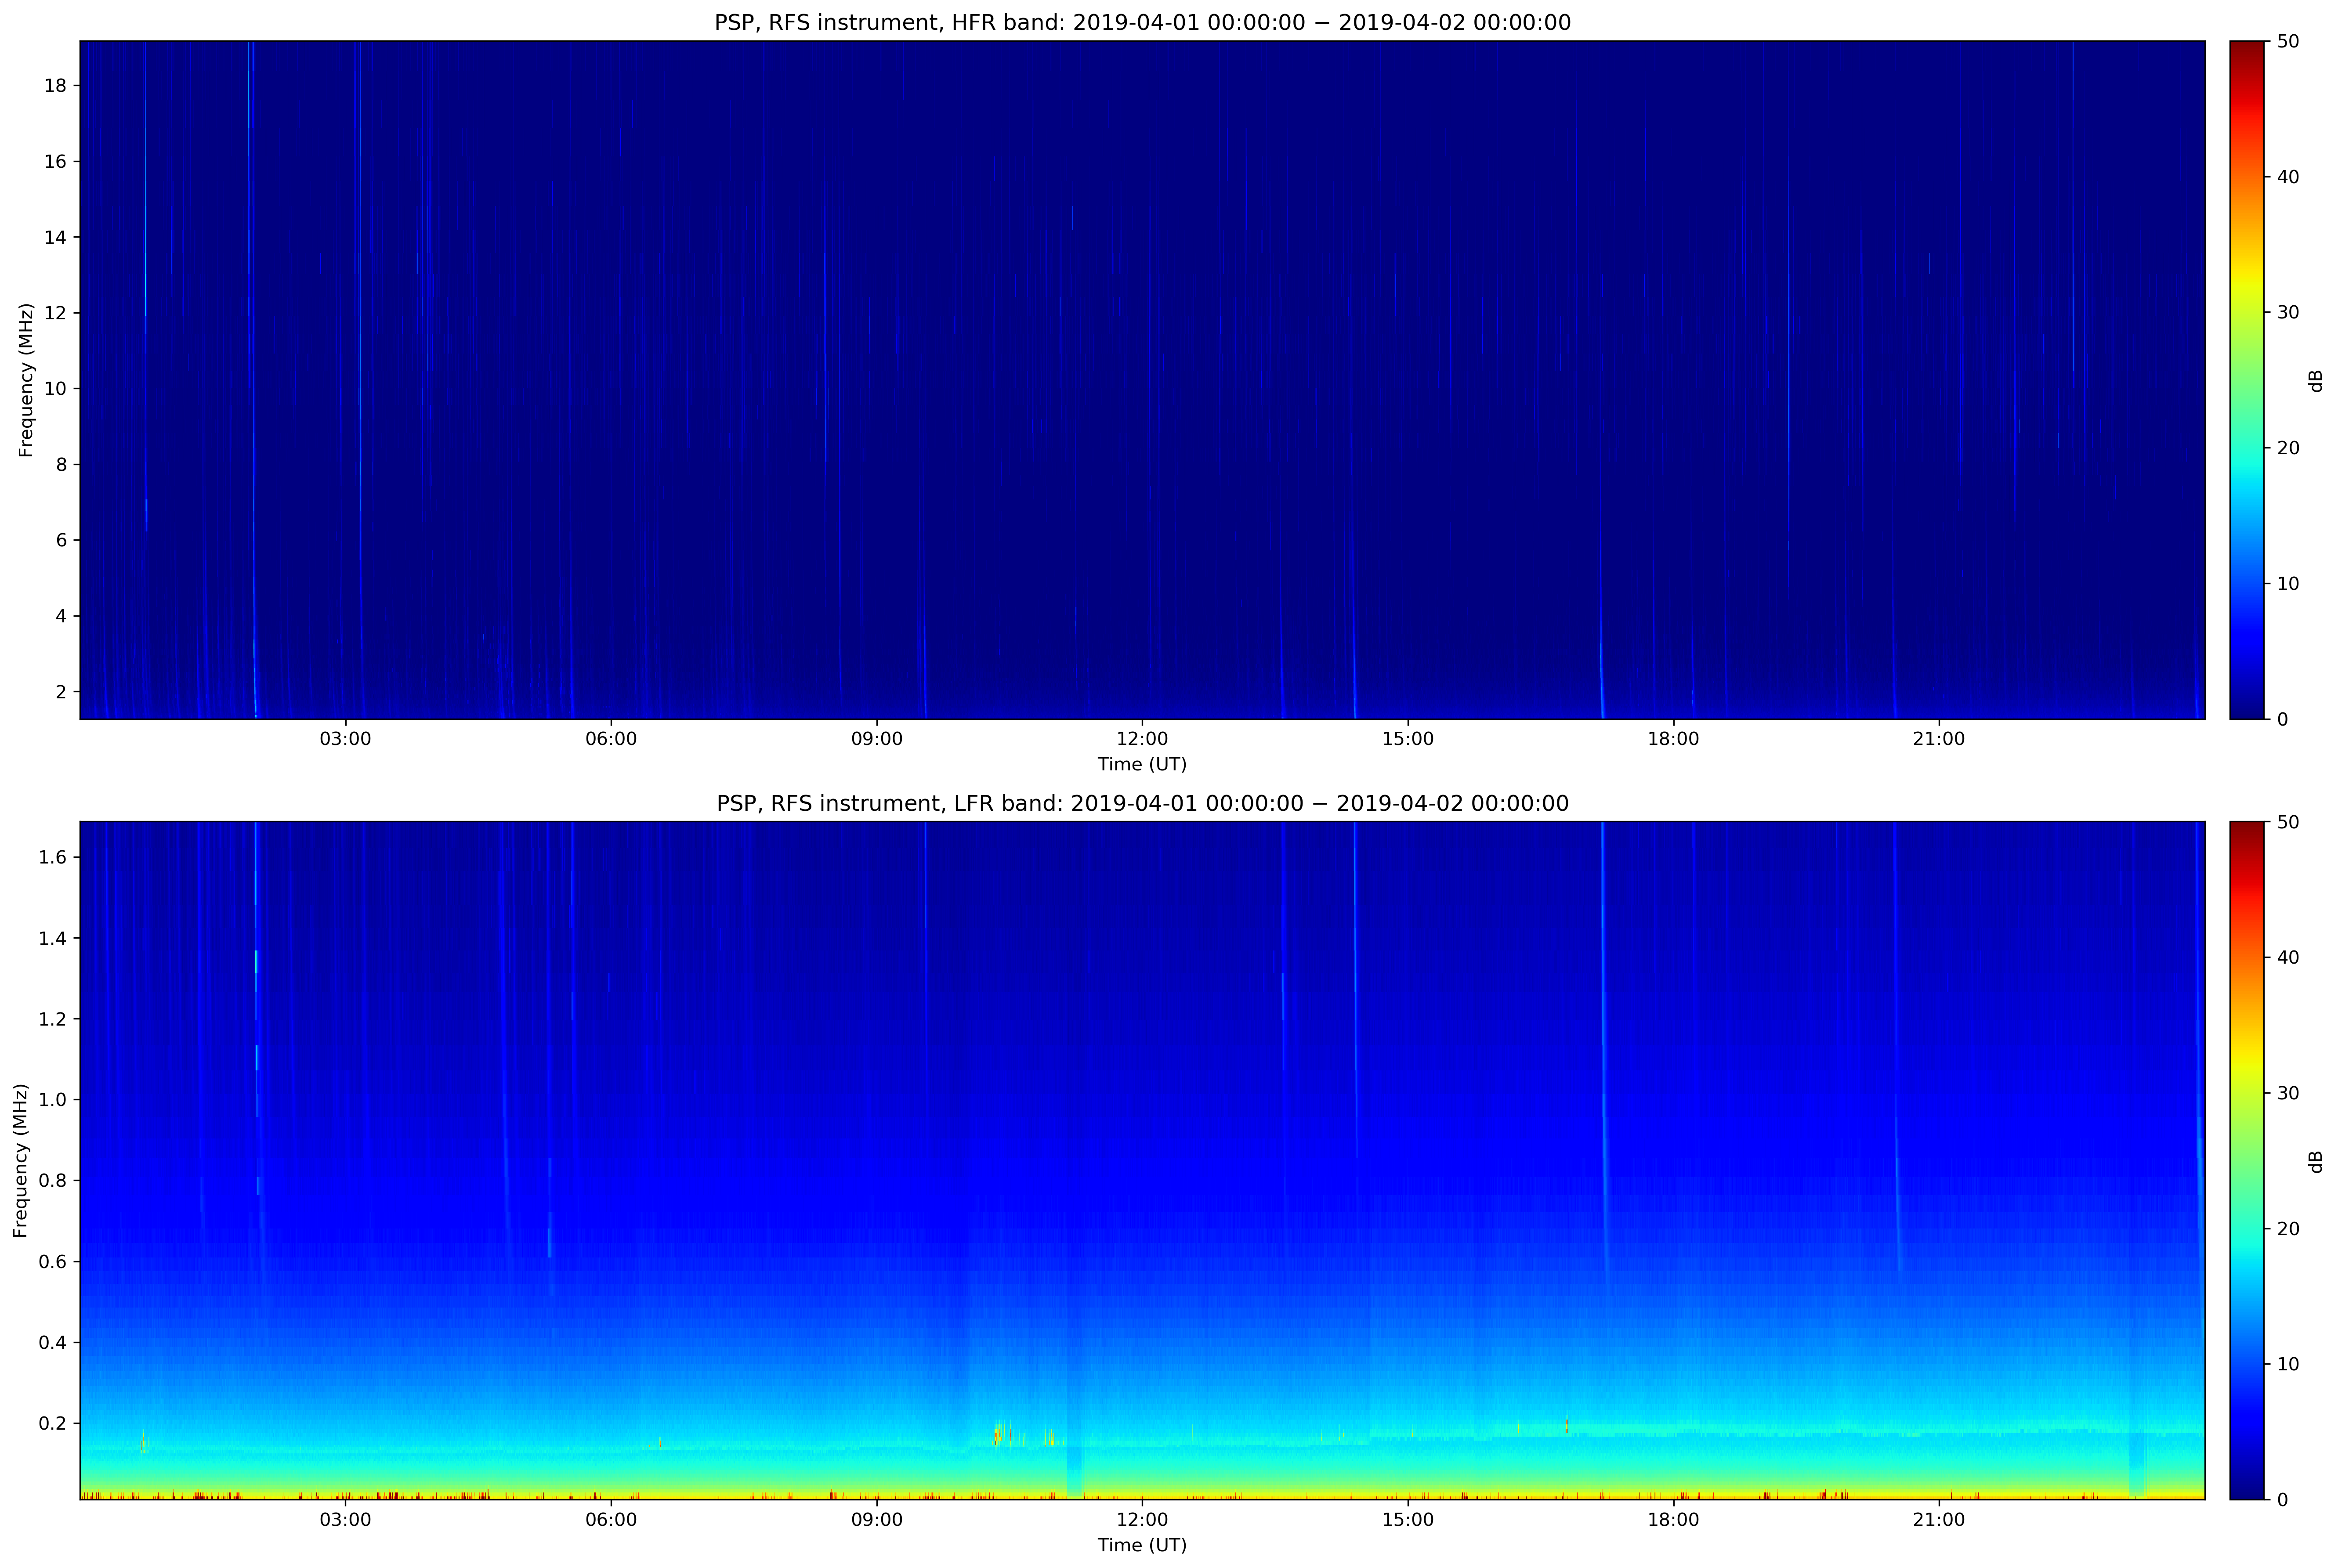

In [46]:
fig = plt.subplots(2, figsize=(20,12), dpi=70)

plt.subplot(2, 1, 1)
plt.pcolormesh(tm_hfr, freq_hfr[1]/10**6, Lp_hfr.T, vmin=0, vmax=50, cmap='jet')
plt.colorbar(label='dB', pad=0.01)
plt.xlabel('Time (UT)')
plt.ylabel('Frequency (MHz)')
plt.title('PSP, RFS instrument, HFR band: {} $-$ {}'.format(tmin_hfr, tmax_hfr))
plt.gca().xaxis.set_major_formatter(myFmt)

plt.subplot(2, 1, 2)
plt.pcolormesh(tm_lfr, freq_lfr[1]/10**6, Lp_lfr.T, vmin=0, vmax=50, cmap='jet')
plt.colorbar(label='dB', pad=0.01)
plt.xlabel('Time (UT)')
plt.ylabel('Frequency (MHz)')
plt.title('PSP, RFS instrument, LFR band: {} $-$ {}'.format(tmin_lfr, tmax_lfr))
plt.gca().xaxis.set_major_formatter(myFmt)

plt.tight_layout()
#plt.savefig('spectrum_{}.png'.format(str(tmin_hfr)[:10]), format='png')
plt.show()